<a href="https://www.kaggle.com/code/abdelazizsami/project-social-networks-a-twitter-network-analysis?scriptVersionId=198562195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

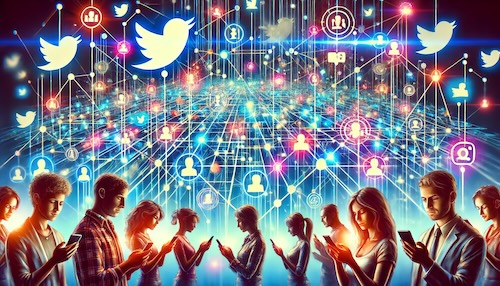

Jump into the buzzing world of Twitter! 🐦 In this project, you'll explore the fascinating network of Twitter connections and uncover the hidden patterns within one of the most popular social networks out there. You'll get hands-on with real Twitter follower data using Pandas, transforming it into a cool directed graph with NetworkX. Along the way, you'll learn how to spot key influencers, find out who follows who, and discover mutual connections between users.

### The Data

# twitter-followers.csv

| Column     | Description              |
|------------|--------------------------|
| `'FOLLOWER'` | id of the user who is following |
| `'FOLLOWEE'` | id of the user being followed |

Throughout the project, you will manipulate and organize this data to extract meaningful insights.

In [1]:
# Imports you'll need for the project
import pandas as pd
import networkx as nx

# Load csv data and store as edgelist (a directed graph)
df = pd.read_csv('/kaggle/input/social-networks-a-twitter-network-analysis/twitter-followers.csv')
T = nx.from_pandas_edgelist(df, 'FOLLOWER', 'FOLLOWEE', create_using=nx.DiGraph())

# Display head of the DataFrame
print(df.head())

   FOLLOWER  FOLLOWEE
0         1         2
1         1         3
2         1         4
3         1         5
4         1         6


In [2]:
# Imports you'll need for the project
import pandas as pd
import networkx as nx

# Load csv data and store as edgelist (a directed graph)
df = pd.read_csv('/kaggle/input/social-networks-a-twitter-network-analysis/twitter-followers.csv')
T = nx.from_pandas_edgelist(df, 'FOLLOWER', 'FOLLOWEE', create_using=nx.DiGraph())

# Display head of the DataFrame
print(df.head())

# Returns True is user_id2 is following user_id1
def is_following(T, user_id1, user_id2):
    return user_id1 in T.neighbors(user_id2)
    
# Returns a list of user ids that are following at least min_following_count other users
def get_users_following_min_accounts(T, min_following_count):
    return [node for node in T.nodes() if len(list(T.neighbors(node))) >= min_following_count]

# Returns a list of user ids that user_id1 and user_id2 both follow
def get_mutual_followees(T, user_id1, user_id2):
    # Get the list of followees for both users
    followees_user1 = list(T.neighbors(user_id1))
    followees_user2 = list(T.neighbors(user_id2))
    
    # Find mutual followees using a loop
    mutual_followees = []
    for user in followees_user1:
        if user in followees_user2:
            mutual_followees.append(user)
    
    return mutual_followees

# Returns the user id of the most connected user (the one with the most followers/followees)
def get_most_connected_user(T):
    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(T)
    
    # Initialize variables to track the maximum centrality and corresponding node
    max_centrality = -1
    most_connected_user = None
    
    # Loop through the dictionary to find the node with the highest centrality
    for node, centrality in degree_centrality.items():
        if centrality > max_centrality:
            max_centrality = centrality
            most_connected_user = node
    
    return most_connected_user

   FOLLOWER  FOLLOWEE
0         1         2
1         1         3
2         1         4
3         1         5
4         1         6
